<a href="https://colab.research.google.com/github/AnIsAsPe/RNN-Resumenes-de-Texto/blob/main/Notebooks/Clasificador_de_Textos_con_Regresi%C3%B3n_log%C3%ADstica_usando_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
datos =datos=pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ElementosEstadisticaMachineLearningPython/master/Semana8/spam_ham_dataset.csv',
                  usecols=['text','label_num'] )
datos.columns=['text','spam']

print(datos.shape)
datos.head()

(5171, 2)


,text,spam
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:

datos['spam'].value_counts()

0    3672
1    1499
Name: spam, dtype: int64

## Preprocesamiento de textos

In [4]:
def preprocesar(texto):
  #convierte a minúsculas
  texto = (texto).lower()

  #elimina stopwords + 'subject'
  stop = re.compile(r'\b(' + r'|'.join(stopwords.words('english')+(['subject'])) + r')\b\s*')
  texto = stop.sub('', texto) 

  #quita puntuaciones y números
  texto = re.sub('[^a-z]+', ' ', texto)

  #lematizar y quedarnos con palabras que tengan más de tres caracteres
  st = PorterStemmer()
  texto = texto.split()
  texto = ' '.join([st.stem(i) for i in texto])
  
  return(texto)

In [5]:
datos['text_pp'] = datos['text'].apply(preprocesar)
datos

,text,spam,text_pp
0,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol meter follow note gave monday p...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,hpl nom januari see attach file hplnol xl hpln...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,neon retreat ho ho ho around wonder time year ...
3,"Subject: photoshop , windows , office . cheap ...",1,photoshop window offic cheap main trend abas d...
4,Subject: re : indian springs\r\nthis deal is t...,0,indian spring deal book teco pvr revenu unders...
...,...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0,put ft transport volum decreas contract thank ...
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,follow nom hpl take extra mmcf weekend tri nex...
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0,calpin daili ga nomin juli mention earlier hop...
5169,Subject: industrial worksheets for august 2000...,0,industri worksheet august activ attach workshe...


# Vectorización de Texto mediante BOW

In [6]:
vectorizer = TfidfVectorizer(min_df=3)
BOW = vectorizer.fit_transform(datos['text_pp'])
BOW.shape

(5171, 10376)

In [7]:
palabras = vectorizer.get_feature_names()
pd.DataFrame(BOW.todense(), index=datos.index, columns=palabras)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aalland,aaron,ab,aba,aback,abacu,abacustech,abandon,abash,...,zodiac,zoloft,zone,zonedubai,zonewww,zs,zu,zurich,zwallet,zyban
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Dividir conjunto de entrenamiento y prueba

In [8]:
X = BOW.todense()
y = datos['spam']


In [9]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2,  
                                                     random_state=3)

In [10]:
#Conjunto de entrenamiento
X_train.shape, y_train.shape

((4136, 10376), (4136,))

In [11]:
#Conjunto de prueba
X_test.shape, y_test.shape

((1035, 10376), (1035,))

# Diseño del modelo de red neuronal usando TensorFlow

In [12]:
import tensorflow as tf  
print(tf.__version__)

2.8.0


In [13]:
tf.random.set_seed(8)



TensorFlow y Keras, ambos proyectos para el aprendizaje profundo,tienen una historia entrelazada. Keras era un conjunto de abstracciones que facilita el aprendizaje profundo, pero necesitada de un backend, desde la versión de Keras v1.1.0 TensorFlow fue el backend predeterminado (antes era Theano).

A partir del lanzamiento de TensorFlow a mediados de 2019, Keras es ahora la API de alto nivel de TensorFlow para facilitar el diseño y entrenamiento de modelos rápidos y fáciles.  

[Video sobre TensorFlow 2.0](https://www.youtube.com/watch?v=EqWsPO8DVXk)

In [14]:
model = tf.keras.Sequential([                     # https://www.tensorflow.org/guide/keras/sequential_model
                             
        tf.keras.Input(shape=(X.shape[1],)),              # El número de neuronas en la capa de entrada es igual al número de características o dimensiones en los datos. 
    
        tf.keras.layers.Dense(                       
                              1,                     # dimensiones de salida
                              activation='sigmoid',  # función de activación  https://www.tensorflow.org/api_docs/python/tf/keras/activations
                              name="layer_1"         # nombre de la capa

                              )
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 1)                 10377     
                                                                 
Total params: 10,377
Trainable params: 10,377
Non-trainable params: 0
_________________________________________________________________


### Alternativas para inicializar una red Secuencial

Una alternativa para establecer las dimensiones de entrada en la primera capa es utilizar el parámetro `input_shape`

In [15]:
model = tf.keras.Sequential([
    
          tf.keras.layers.Dense(1, 
                                input_shape = (X.shape[1],),      # dimensiones de la entrada  
                                activation='sigmoid',             # para la regresión logística
                                name="layer_1"                    # nombre de la capa
                                ),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 1)                 10377     
                                                                 
Total params: 10,377
Trainable params: 10,377
Non-trainable params: 0
_________________________________________________________________


Otra manera de construir un modelo secuencial es declararlo y a continuación añadir capas ustilizando el método `add`

In [16]:
model = tf.keras.Sequential()
    
model.add(tf.keras.Input(shape=(X.shape[1],)))

model.add(tf.keras.layers.Dense(1,
                                  activation='sigmoid',        # para la regresión logística
                                  name="layer_1"   
                                 ))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 1)                 10377     
                                                                 
Total params: 10,377
Trainable params: 10,377
Non-trainable params: 0
_________________________________________________________________


### Añadir y borrar capas, consultar número de capas de la red y  visualizar modelo,

In [17]:
model.add(tf.keras.layers.Dense(1,
                                  activation='sigmoid',       
                                  name="layer_2")  
                                  )
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 1)                 10377     
                                                                 
 layer_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 10,379
Trainable params: 10,379
Non-trainable params: 0
_________________________________________________________________


In [18]:
len(model.layers)  # layers es un atributo del modelo que regresa una lista con las capas del modelo

2

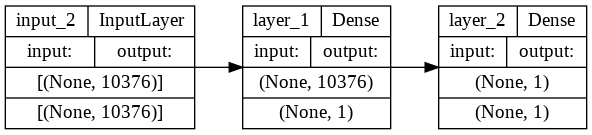

In [19]:
tf.keras.utils.plot_model( 
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="LR",
    dpi=96,
)

In [20]:

model.pop()    # borra la última capa
print(len(model.layers))
model.summary()


1
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 1)                 10377     
                                                                 
Total params: 10,377
Trainable params: 10,377
Non-trainable params: 0
_________________________________________________________________


##<h2>Entrenamiento y validación

Despues de construir la red neuronal se debe configurar el proceso de entrenamiento utilizando el metodo `compile()`


In [21]:
model.compile(optimizer='adam',             # el optimizador sirve para encontrar los pesos que minimizan la función de pérdida
                                            # adam: stochastic gradient descent adaptativo
                                            # https://keras.io/api/optimizers/adam/
              
              loss='binary_crossentropy',   # función que evalua que tan bien el algoritmo modela el conjunto de datos
                                            # https://keras.io/api/losses/
              
              metrics=['accuracy']
              )


Para entrenar el módelo utilizamos el método `fit()` 

el parámetro epoch se puede usar para buscar minimizar el error, aunque también podemos caer en sobreajuste

In [22]:
model.fit( X_train, y_train,
          epochs=10,         # número de iteraciones sobre los datos
          validation_data=(X_test, y_test)
          )

Epoch 1/10
130/130 [==============================] - 4s 5ms/step - loss: 0.6348 - accuracy: 0.7614 - val_loss: 0.5822 - val_accuracy: 0.7604
Epoch 2/10
130/130 [==============================] - 0s 3ms/step - loss: 0.5385 - accuracy: 0.7913 - val_loss: 0.5056 - val_accuracy: 0.7826
Epoch 3/10
130/130 [==============================] - 0s 3ms/step - loss: 0.4700 - accuracy: 0.8221 - val_loss: 0.4497 - val_accuracy: 0.8280
Epoch 4/10
130/130 [==============================] - 0s 3ms/step - loss: 0.4187 - accuracy: 0.8559 - val_loss: 0.4066 - val_accuracy: 0.8560
Epoch 5/10
130/130 [==============================] - 1s 4ms/step - loss: 0.3781 - accuracy: 0.8885 - val_loss: 0.3718 - val_accuracy: 0.8850
Epoch 6/10
130/130 [==============================] - 1s 4ms/step - loss: 0.3447 - accuracy: 0.9142 - val_loss: 0.3427 - val_accuracy: 0.9063
Epoch 7/10
130/130 [==============================] - 1s 4ms/step - loss: 0.3166 - accuracy: 0.9359 - val_loss: 0.3178 - val_accuracy: 0.9266
Epoch 

El 130/130que vemos es el resultadom redondeado hacia arriba, de dividir el número de registros en el conjunto de entrenamiento entre 32, que es el parámetro por defaul para batch_size

In [23]:
# batch_size
X_train.shape[0]/32

129.25

### Capa Dropout 
Para prevenir sobreajuste

In [24]:
model = tf.keras.Sequential()
    
model.add((tf.keras.layers.InputLayer(input_shape=(X.shape[1],))))

model.add(tf.keras.layers.Dropout(0.10))

model.add(tf.keras.layers.Dense(1,activation='sigmoid', name="output_layer" ))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 10376)             0         
                                                                 
 output_layer (Dense)        (None, 1)                 10377     
                                                                 
Total params: 10,377
Trainable params: 10,377
Non-trainable params: 0
_________________________________________________________________


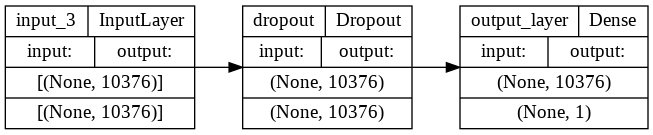

In [25]:
tf.keras.utils.plot_model( 
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="LR",
    dpi=96,
)

In [26]:
model.compile(optimizer='adam',             # stochastic gradient descent adaptativo
                                            # https://keras.io/api/optimizers/adam/
              
              loss='binary_crossentropy',   # función objetivo  que se busca minimizar
                                            # https://keras.io/api/losses/
              
              metrics=['accuracy']
              )
model.fit(X_train, y_train, 
          epochs= 10, 
          validation_data=(X_test, y_test))

Epoch 1/10
130/130 [==============================] - 1s 5ms/step - loss: 0.6368 - accuracy: 0.7449 - val_loss: 0.5851 - val_accuracy: 0.7401
Epoch 2/10
130/130 [==============================] - 1s 4ms/step - loss: 0.5423 - accuracy: 0.7788 - val_loss: 0.5098 - val_accuracy: 0.7671
Epoch 3/10
130/130 [==============================] - 0s 4ms/step - loss: 0.4753 - accuracy: 0.8068 - val_loss: 0.4549 - val_accuracy: 0.8097
Epoch 4/10
130/130 [==============================] - 0s 3ms/step - loss: 0.4249 - accuracy: 0.8433 - val_loss: 0.4125 - val_accuracy: 0.8454
Epoch 5/10
130/130 [==============================] - 1s 4ms/step - loss: 0.3850 - accuracy: 0.8733 - val_loss: 0.3780 - val_accuracy: 0.8763
Epoch 6/10
130/130 [==============================] - 0s 3ms/step - loss: 0.3522 - accuracy: 0.9050 - val_loss: 0.3492 - val_accuracy: 0.8976
Epoch 7/10
130/130 [==============================] - 1s 4ms/step - loss: 0.3237 - accuracy: 0.9287 - val_loss: 0.3243 - val_accuracy: 0.9159
Epoch 

# Red neuronal de clasificación con más de una capa

In [27]:
model = tf.keras.Sequential()
    
model.add((tf.keras.layers.InputLayer(input_shape=(X.shape[1],))))

model.add(tf.keras.layers.Dense((2/3 * X.shape[1]  + 1 ), activation='relu',name="hidden_layer_1" ))

model.add(tf.keras.layers.Dense(1,activation='sigmoid', name="output_layer" ))



model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 6918)              71788086  
                                                                 
 output_layer (Dense)        (None, 1)                 6919      
                                                                 
Total params: 71,795,005
Trainable params: 71,795,005
Non-trainable params: 0
_________________________________________________________________


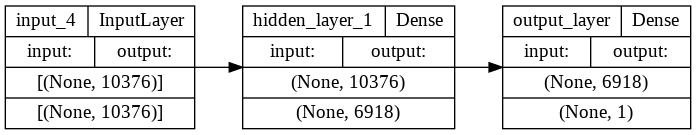

In [28]:
tf.keras.utils.plot_model( 
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="LR",
    dpi=96,
)

In [29]:
model.compile(optimizer='adam',             # stochastic gradient descent adaptativo
                                            # https://keras.io/api/optimizers/adam/
              
              loss='binary_crossentropy',   # función objetivo  que se busca minimizar
                                            # https://keras.io/api/losses/
              
              metrics=['accuracy']
              )
model.fit(X_train, y_train,
          epochs=5, 
          validation_data=(X_test, y_test))

Epoch 1/5
130/130 [==============================] - 3s 20ms/step - loss: 0.1256 - accuracy: 0.9420 - val_loss: 0.0481 - val_accuracy: 0.9845
Epoch 2/5
130/130 [==============================] - 2s 19ms/step - loss: 0.0072 - accuracy: 0.9983 - val_loss: 0.0481 - val_accuracy: 0.9845
Epoch 3/5
130/130 [==============================] - 2s 18ms/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0577 - val_accuracy: 0.9836
Epoch 4/5
130/130 [==============================] - 2s 18ms/step - loss: 5.1177e-04 - accuracy: 1.0000 - val_loss: 0.0588 - val_accuracy: 0.9836
Epoch 5/5
130/130 [==============================] - 2s 18ms/step - loss: 3.0728e-04 - accuracy: 1.0000 - val_loss: 0.0612 - val_accuracy: 0.9836


# Referencia:

1. Keras vs. tf.keras: What’s the difference in TensorFlow 2.0? [Internet]. PyImageSearch. 2019 [citado 20 de julio de 2021]. Disponible en: https://www.pyimagesearch.com/2019/10/21/keras-vs-tf-keras-whats-the-difference-in-tensorflow-2-0/

1. Krishnan S. How to determine the number of layers and neurons in the hidden layer? [Internet]. Geek Culture. 2021 [citado 25 de abril de 2022]. Disponible en: https://medium.com/geekculture/introduction-to-neural-network-2f8b8221fbd3

